# stryke

Individual Based Monte Carlo model simulating fish entrainment through a hydroelectric facility. For information on setting up a project spreadsheet, please refer to the ReadMe [Readme](https://github.com/knebiolo/stryke/blob/master/README.md).  This project notebook will guide the end user through the analytical phases of an entrainment impact assessment.  If you're in JupyterLab, use the table of contents for navigation.

# Connect to software
The first step is to connect this notebook to stryke, which can be found in the directory you previously cloned from GitHub.  Don't know how to clone with GitHub desktop?  [Folks over at GitHub have you covered](https://docs.github.com/en/desktop/adding-and-cloning-repositories/cloning-and-forking-repositories-from-github-desktop) 

In [1]:
directory = r"C:\Users\knebiolo\OneDrive - Kleinschmidt Associates, Inc\Software\stryke\Stryke"

import sys
sys.path.append(directory)

now that we have connected to stryke, let's import it and set up the remaining notebook environment.

In [6]:
import stryke
import os
%matplotlib inline

# Fit Entrainment Rates
If you do not have existing empirical data for your facility of interest, stryke can query the EPRI entrainment database and develop them for you.  To fit a distribution, simply pass a list of arguments to stryke. The list of arguments, their datatype, and explanations are below.  The following example queries the EPRI database to return a sample of entrainment observations of Catastomidae in the winter within the great lakes watershed while leaving out Potato Rapids from the sample: 

'Family = 'Catostomidae', Month = [1,2,12], HUC02= [4], NIDID= 'WI00757''

| Parameter       | Data Type |                                             Comment                                           |
|-----------------|-----------|-----------------------------------------------------------------------------------------------|
|states           |String     |(not required) State abbreviations to filter the dat                                           |
|plant_cap        |String     |(not required) Plant capacity (cfs) with a direction for filtering (> or <=)                   |
|Family, Genus, Species|String     |(at least one required) taxonomic classifications                                         |
|HUC02, HUC04, HUC06, HUC08|String      |(not required) Hydrologic Unit Codes for geographic filtering, leading zeros required|
|NIDID         |String      |(not required) National Inventory of Dams identifier - used to filter out a facility              |
|River             |String     |(not required) River name for filtering                                                 |

When the next cell is run, stryke will return a figure with four histograms that depict natural logarithm transformed entrainment rates (one observed, three simulated).  Stryke fits a Log Normal, Weibull, and Pareto distribution to the returned data and produces a p-value from a Kolmogorov-Smirnof test, where H0 = no difference between observed and simulated histogram.  The distribution with the largest p-value  best describes trends in observed data. The query above produced the figure below.  In this instance, the Log Normal had the highest p-value and is most like the observed data.  For most queries, the Log Normal will be the best distribution.  The Weibull works when there are fewer observations with low rates, and the Pareto only works in special cases when observations are monotonically decreasing after log transforming them. 

<img src="https://github.com/knebiolo/stryke/assets/61742537/1b57783c-0913-40d9-913a-4f45ee2ab8a0" width="400" height="auto"/>



--------------------------------------------------------------------------------------------
out of 42 potential samples 8 had this species present for 0.1905 probability of presence
--------------------------------------------------------------------------------------------
There are 8 records left to describe entrainment rates
The maximum entrainment rate for this fish is: 0.141338761
--------------------------------------------------------------------------------------------
The Pareto distribution has a shape parameter of b: 0.829,  location: 0 and scale: 0.0072
--------------------------------------------------------------------------------------------
The Log Normal distribution has a shape parameter of b: 0.8248,  location: 0 and scale: 0.0242
--------------------------------------------------------------------------------------------
The Weibull Max distribution has a shape parameter of c: 1.0809,  location: 0 and scale: 0.0376
--------------------------------------------------

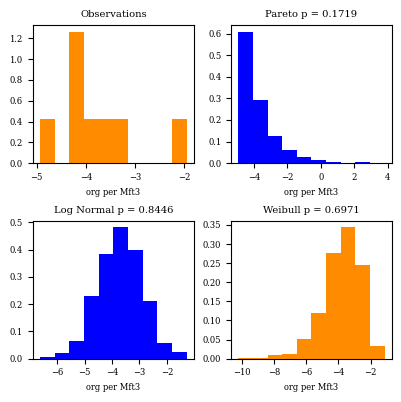

The log normal distribution has a shape parameter s: 0.7105, location: -0.9333 and scale: 7.2837


In [4]:
#%% Pass EPRI filter, fit distributions
fish = stryke.epri(Family = 'Centrarchidae', Month = [1,2,12], HUC02= [3], NIDID= 'WI00757')
fish.ParetoFit()
fish.LogNormalFit()
fish.WeibullMinFit()
fish.plot()
fish.LengthSummary()

If, and only if you are satisfied with the distribution's fit, run the next cell.  This will arrange the parameters so that you can copy and paste them directly onto the **Population tab**.

In [4]:
fish.summary_output(directory, dist = 'Log Normal')

# Running a Simulation

Following completion of the spreadsheet interface, we can now run a simulation.  First identify the name of the spreadsheet interface, its directory, and run the next cell to start stryke.

In [8]:
# identify the project directory
proj_dir = r"J:\868\022\Calcs\validation"

# Identify spreadsheet interface name
wks = 'HUC02_Schaghticoke.xlsx'
# Identify spreadsheet interface directory
wks_dir = os.path.join(proj_dir,wks)
# Create and Run a simulation.
simulation = stryke.simulation(proj_dir,wks, output_name = 'HUC02_Schaghticoke')

simulation.run()
simulation.summary()

results = simulation.beta_df
day_sum = simulation.daily_summary
year_sum = simulation.cum_sum
length = simulation.length_summ

# Summarize over iterations by Species and Flow Scenario
with pd.ExcelWriter(wks_dir,engine = 'openpyxl', mode = 'a') as writer:
    results.to_excel(writer,sheet_name = 'beta fit')
    day_sum.to_excel(writer,sheet_name = 'daily summary')    
    year_sum.to_excel(writer,sheet_name = 'yearly summary')
    length.to_excel(writer,sheet_name = 'length data')

SSLError: HTTPSConnectionPool(host='waterservices.usgs.gov', port=443): Max retries exceeded with url: /nwis/dv/?format=json%2C1.1&sites=01334500&startDT=1995-01-01&endDT=1995-12-31 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))